<a href="https://colab.research.google.com/github/whiterhino-cell/heart-failure-/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import the Dependencies***

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


Here we will be experimenting with 3 algorithms

1.KNeighborsClassifier

2.RandomForestClassifier

3.Logistic Regression 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Data Collection and Processing**

In [3]:
#loading the csv data to a Pandas DataFrame
heart_data=pd.read_csv('/content/heart.csv')

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# number of rows of the dataset
heart_data.shape

(1025, 14)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of Target Variables
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
import seaborn as sns

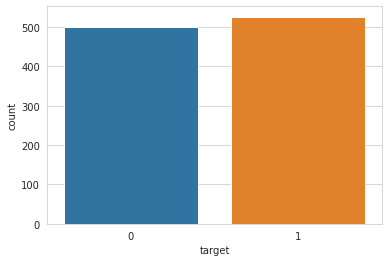

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_data)

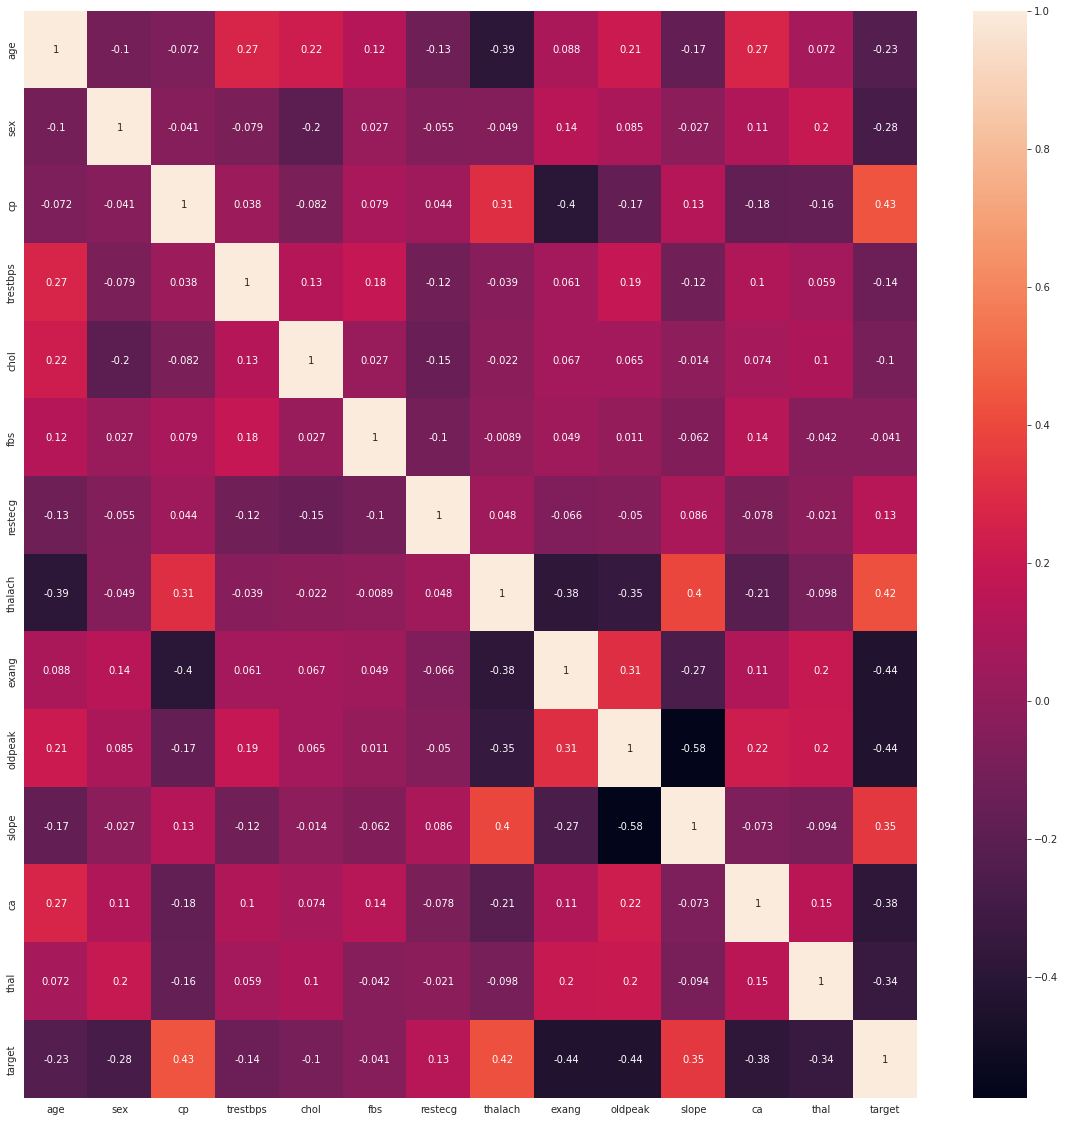

In [13]:

corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b29af33d0>,
      dtype=object)

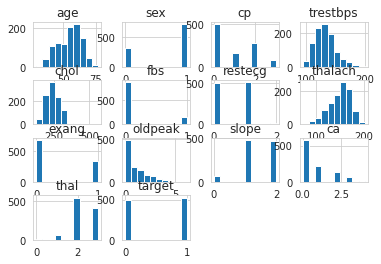

In [14]:
heart_data.hist()

**Splitting the Features and Target**

In [15]:
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [16]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [17]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


**Splitting the Data into Training & Test Data**

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


**Model Training :**

**KNeighborsClassifier**

In [20]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K vlaues')

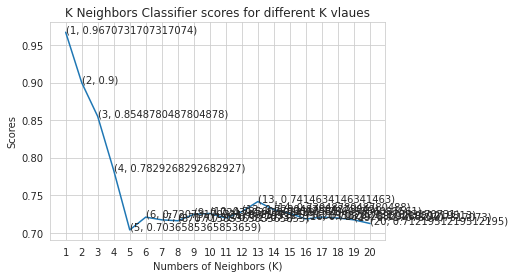

In [21]:
plt.plot([k for k in range(1,21)],knn_scores)
for i in range(1,21):
  plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Numbers of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K vlaues')

In [22]:
# accuracy on training data
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)

In [23]:
score.mean()

0.9670731707317074

In [24]:
# accuracy on test data
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,X_test,Y_test,cv=10)

In [25]:
score.mean()

0.6642857142857143

**Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# accuracy on training data
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X_train,Y_train,cv=10)

In [28]:
score.mean()

0.9853658536585366

In [29]:
# accuracy on test data
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X_test,Y_test,cv=10)

In [30]:
score.mean()

0.8597619047619048

**Logistic Regression**

In [31]:
model = LogisticRegression()

In [32]:
# training the LogisticRegression model with Training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**Model Evaluation**

**Accuracy Score**

In [33]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy on Training data :',training_data_accuracy)

Accuracy on Training data : 0.8524390243902439


In [35]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy on test data: ',test_data_accuracy)

Accuracy on test data:  0.8048780487804879


**Building a Predictive System**

In [37]:
#title Default title text
input_data = (67,0,0,106,223,0,1,142,0,0.3,2,2,2)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))